In [1]:
import tensorflow as tf
import os

2023-10-24 20:15:43.148880: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-24 20:15:43.308405: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-24 20:15:43.308480: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-24 20:15:43.308558: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-24 20:15:43.336493: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-24 20:15:43.339536: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

In [2]:
import numpy as np
from matplotlib import pyplot as plt

In [3]:
test_data = tf.keras.utils.image_dataset_from_directory(os.path.join("data", 'TEST'))

Found 2487 files belonging to 4 classes.


In [10]:
test_data_itr = test_data.as_numpy_iterator()

In [11]:
batch = test_data_itr.next()

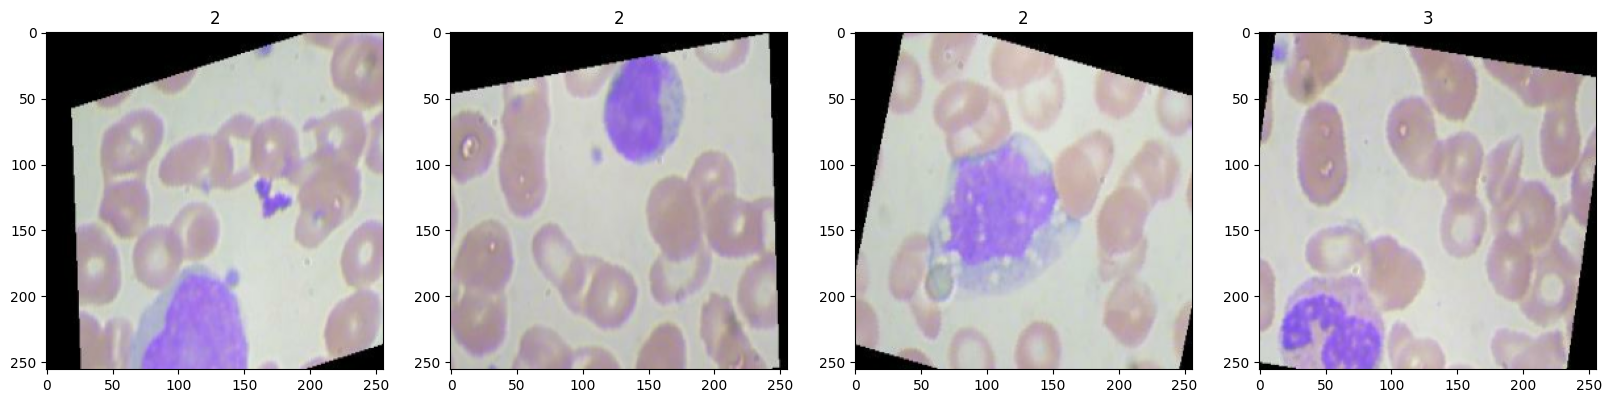

In [19]:
batch = train_data.as_numpy_iterator().next()
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [5]:
test_data = test_data.map(lambda x, y: (x/255, y))

In [6]:
train_data = tf.keras.utils.image_dataset_from_directory(os.path.join("data", 'TRAIN'))

Found 9957 files belonging to 4 classes.


In [7]:
val_data = tf.keras.utils.image_dataset_from_directory(os.path.join("data", 'TEST_SIMPLE'))

Found 71 files belonging to 4 classes.


In [8]:
val_data = val_data.map(lambda x, y: (x/255, y))

In [9]:
train_data = train_data.map(lambda x, y: (x/255, y))

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [11]:
model = Sequential()
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(4, activation='softmax'))

In [12]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

Trainable params: 3697396 (14.10 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
logdir = 'logdir'
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir)

In [16]:
hist = model.fit(train_data, epochs=20, validation_data=val_data, callbacks=[tensorboard_callback])

Epoch 1/20


ValueError: in user code:

    File "/1tb/coding/PythonProjects/AI/bloodCellClassifier/.venv/lib/python3.11/site-packages/keras/src/engine/training.py", line 1377, in train_function  *
        return step_function(self, iterator)
    File "/1tb/coding/PythonProjects/AI/bloodCellClassifier/.venv/lib/python3.11/site-packages/keras/src/engine/training.py", line 1360, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/1tb/coding/PythonProjects/AI/bloodCellClassifier/.venv/lib/python3.11/site-packages/keras/src/engine/training.py", line 1349, in run_step  **
        outputs = model.train_step(data)
    File "/1tb/coding/PythonProjects/AI/bloodCellClassifier/.venv/lib/python3.11/site-packages/keras/src/engine/training.py", line 1127, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/1tb/coding/PythonProjects/AI/bloodCellClassifier/.venv/lib/python3.11/site-packages/keras/src/engine/training.py", line 1185, in compute_loss
        return self.compiled_loss(
    File "/1tb/coding/PythonProjects/AI/bloodCellClassifier/.venv/lib/python3.11/site-packages/keras/src/engine/compile_utils.py", line 277, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/1tb/coding/PythonProjects/AI/bloodCellClassifier/.venv/lib/python3.11/site-packages/keras/src/losses.py", line 143, in __call__
        losses = call_fn(y_true, y_pred)
    File "/1tb/coding/PythonProjects/AI/bloodCellClassifier/.venv/lib/python3.11/site-packages/keras/src/losses.py", line 270, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/1tb/coding/PythonProjects/AI/bloodCellClassifier/.venv/lib/python3.11/site-packages/keras/src/losses.py", line 2532, in binary_crossentropy
        backend.binary_crossentropy(y_true, y_pred, from_logits=from_logits),
    File "/1tb/coding/PythonProjects/AI/bloodCellClassifier/.venv/lib/python3.11/site-packages/keras/src/backend.py", line 5824, in binary_crossentropy
        return tf.nn.sigmoid_cross_entropy_with_logits(

    ValueError: `logits` and `labels` must have the same shape, received ((None, 4) vs (None, 1)).
